# TODO NEXT

- rename functions as _xfuncn and xfuncn where former outputs raw info, second renders
  e.g. _xls and xls (where xls is _xls | html)
  
- **DONE**: rename disk as df_bar, include "id" parameter, bar as coloured width html table
  - WHY?: 1-line of javascript - if ! exists create.
    
- Reimplement in Python in OpenStack_MultipleSystem.ipynb 
  - show disk usage for each node
  - summarize worst case disk usage for each platform
    - optional: show average and max
  - implement HTML table barchart
    - show trend of node disk space
  - implement HTML table piechart
    - show disk space usage
      - extend to show top-4 dirs

# Creating an HTML table from CSV data (for the shell)

Let's first write some Python to do the job.

We're not going to do all this in bash - we just want the result available as a callable bash function

As long as the end user uses the bash paradigm supplemented with bash graphical functions, this is fine.


In [163]:
%%file csv2htmltable.py

import sys
import csv
import io

'''
    Read optional command line arguments
    
    -h: header: Use <th> tags for first row (will be highlighted as header)

    -d: delimiter: Used to explicitly specify what csv delimiter to use
                   By default: none, we will sniff the data
    -v: verbosity:
'''
header=False
delimiter=None
verbosity=0

a=1
while len(sys.argv) > a:
    arg=sys.argv[a]
    a += 1
    if arg == "-v":
        verbosity += 1
    if arg == "-h":
        header=True
    if arg == "-d":
        delimiter=sys.argv[a]
        a += 1
    
def stderr(*args, **kwargs):
    ''' print to stderr '''
    print(*args, file=sys.stderr, **kwargs)
    
def tohex(str):
    ''' convert string to hexadecimal string '''
    return ":".join("{:02x}".format(ord(c)) for c in str)

def compressMultipleSpaces(text):
    ''' If delimiter 'SPACES' is used rather than space ' ', we want multiple spaces to act as
        only one delimiter - so we reduce multiple spaces down to just one space here
    '''

    for line in text:
        # Compress multiple spaces
        templine=''
        lastchar=''
        for char in line:
            if char == ' ' and lastchar == ' ':
                pass
            templine += char
            lastchar=char
        line=templine
        
        text += line

    return text

''' Read in all the data from stdin in advance, so that we can sniff the data to determine it's dialect '''
text=' '.join(sys.stdin.readlines())

''' Handle special delimiter values TAB and SPACES '''
if delimiter == 'TAB':
    delimiter=chr(9)

if delimiter == 'SPACES':
    delimiter=' '
    text = compressMultipleSpaces(text)

''' Create the csvreader using either the specified delimiter, or the sniffed dialect '''
if delimiter:
    csvreader = csv.reader(text.splitlines(), delimiter=delimiter, quotechar='|')
else:
    sample_len = 100
    if len(text) < 100:
        sample_len = len(text)
    
    dialect = csv.Sniffer().sniff(text[:sample_len])
    if verbosity > 1:
        stderr("DELIMITER=<" + tohex(dialect.delimiter) + ">")
    csvreader = csv.reader(text.splitlines(), dialect=dialect, quotechar='|')

'''
    Output the data as an html table
'''
print('<table>')

for row in csvreader:
    #print("COLS=" + str(len(row)))
    #print("ROW=<" + str(row) + ">")
    #continue
    if header:
        print('<tr><th>')
        print('</th><th>'.join(row))
        print('</th></tr>')
        header=False
    else:
        print('<tr><td>')
        print('</td><td>'.join(row))
        print('</td></tr>')
        
print('</table>')

Created file 'C:\tools\cygwin\home\mjbright\src\git\GIT_mjbright\jupyter-for-everything-else\csv2htmltable.py'.


# Displaying data as a table

Now let's see how we can use this to display some html from within the bash shell.

In the first cells we will look at
- the output of du -s, du -sh, sorted
- the output converted into html, then displayed as html

In [164]:
du -s * | head -5

29	__pycache__
1	2015-Oct-17_Pyconfr_Pau_IPython_vers_Jupyter
24	2015-Oct-17_Pyconfr_Pau_IPython_vers_Jupyter.ipynb
1	clouds.yaml
120	CSS_Graphics_and_Charts.ipynb

In [165]:
du -sh * | head -5

29K	__pycache__
1.0K	2015-Oct-17_Pyconfr_Pau_IPython_vers_Jupyter
24K	2015-Oct-17_Pyconfr_Pau_IPython_vers_Jupyter.ipynb
1.0K	clouds.yaml
120K	CSS_Graphics_and_Charts.ipynb

In [166]:
du -sh * | sort -hr | head -5

207M	Demos
50M	tmp
24M	OLD
21M	stitchfix-d3-jupyter-tutorial
17M	js

In [167]:
du -sh * | sort -hr | python csv2htmltable.py TAB | head -5

<table>
<tr><td>
207M</td><td>Demos
</td></tr>
<tr><td>

In [168]:
du -sh * | sort -hr | python csv2htmltable.py TAB | html

207M,Demos
50M,tmp
24M,OLD
21M,stitchfix-d3-jupyter-tutorial
17M,js
14M,node_modules
13M,MOOCs
7.4M,lightning-example-notebooks
5.4M,images
5.1M,TESTS
2.1M,Experiments


In [169]:
source ~/.metakernelrc

[Sun, Jul 17, 2016 8:13:54 AM] Sourcing <</home/mjbright/.metakernelrc>>

In [172]:
du -sh * | sort -hr | head -5 | csv2html TAB  | html

207M,Demos
50M,tmp
24M,OLD
21M,stitchfix-d3-jupyter-tutorial
17M,js


# Let's look at some 'real' csv files

In [174]:
ls *.csv

data.csv
date_trend.csv
disk_usage.csv
pop_age.csv

In [175]:
cat pop_age.csv

age,population
<5,2704659
5-13,4499890
14-17,2159981
18-24,3853788
25-44,14106543
45-64,8819342
>65,612463

In [176]:
cat pop_age.csv  | python csv2htmltable.py -h | html

age,population
<5,2704659
5-13,4499890
14-17,2159981
18-24,3853788
25-44,14106543
45-64,8819342
>65,612463


In [177]:
cat date_trend.csv

date,yValue
1-May-12,58.13
30-Apr-12,53.98
27-Apr-12,67.00
26-Apr-12,89.70
25-Apr-12,99.00
24-Apr-12,130.28
23-Apr-12,166.70
20-Apr-12,234.98
19-Apr-12,345.44
18-Apr-12,443.34
17-Apr-12,543.70
16-Apr-12,580.13
13-Apr-12,605.23
12-Apr-12,622.77
11-Apr-12,626.20
10-Apr-12,628.44
9-Apr-12,636.23
5-Apr-12,633.68
4-Apr-12,624.31
3-Apr-12,629.32
2-Apr-12,618.63
30-Mar-12,599.55
29-Mar-12,609.86
28-Mar-12,617.62
27-Mar-12,614.48
26-Mar-12,606.98

In [179]:
cat date_trend.csv | python csv2htmltable.py | html

<IPython.core.display.HTML object>

In [180]:
cat date_trend.csv | python csv2htmltable.py |& html

In [181]:
cat date_trend.csv | python csv2htmltable.py -h  -d ',' | html

date,yValue
1-May-12,58.13
30-Apr-12,53.98
27-Apr-12,67.00
26-Apr-12,89.70
25-Apr-12,99.00
24-Apr-12,130.28
23-Apr-12,166.70
20-Apr-12,234.98
19-Apr-12,345.44
18-Apr-12,443.34


## Great we can use this for pretty printing any lists ...

In [187]:
find | python csv2htmltable.py |& html

In [188]:
source ~/.metakernelrc

[Sun, Jul 17, 2016 8:17:59 AM] Sourcing <</home/mjbright/.metakernelrc>>

In [189]:
find | head -5 | list2html | html

.
./.git
./.git/COMMIT_EDITMSG
./.git/config
./.git/description


In [190]:
html_find .

Path
.
./.git
./.git/COMMIT_EDITMSG
./.git/config
./.git/description
./.git/FETCH_HEAD
./.git/HEAD
./.git/hooks
./.git/hooks/applypatch-msg.sample
./.git/hooks/commit-msg.sample


# This reminds me of *xmlterm* my favourite doomed Mozilla project

![xmlterm](http://www.xml.com/2000/06/07/xmlterm/fig3.gif)

In [194]:
html '<iframe height=900 width=900 src="http://www.mozillazine.org/talkback.html?article=1243"> </iframe>'

# Which led on to GraphTerm from the same guy ....

![](https://github.com/mitotic/graphterm/raw/master/doc-images/gt-screen-gadmin-terminals.png)

## Can I do something similar?

Of course we can building upon the display capabilities I added to metakernel_bash, I quickly hacked together an "xls" function

Here's a quick and dirty hack to display image files and html in an ls thumbnail listing - from the command line !

In [97]:
source ~/.metakernelrc

[Sun, Jul 17, 2016 11:34:02 AM] Sourcing <</home/mjbright/.metakernelrc>>

In [98]:
type xls

xls is a function
xls () 
{ 
    [ -z "$1" ] && set -- *;
    LS_OPTS="";
    COLS=4;
    { 
        echo "<table>";
        let COL=-1;
        for file in "$@";
        do
            case $file in 
                -*)
                    LS_OPTS="$LS_OPTS $file"
                ;;
                *)
                    let COL=$(((COL+1) % COLS));
                    [ $COL -eq 0 ] && echo "<tr>";
                    echo "<td>";
                    display_file "$file";
                    echo "</td>";
                    [ $COL -eq $((COLS - 1)) ] && echo "</tr>"
                ;;
            esac;
        done;
        [ $COL -ne $((COLS - 1)) ] && echo "</tr>";
        echo "</table>"
    } | html
}

In [190]:
source ~/.metakernelrc;

[Sun, Jul 17, 2016 1:10:39 PM] Sourcing <</home/mjbright/.metakernelrc>>

In [191]:
#_xls 2015-Oct-17_Pyconfr_Pau_IPython_vers_Jupyter.ipynb


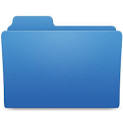
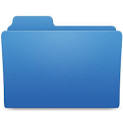
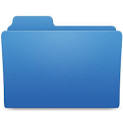
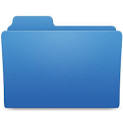
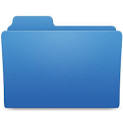
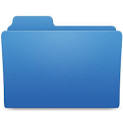
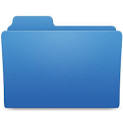
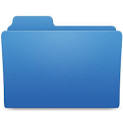
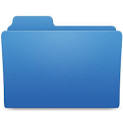
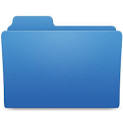
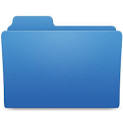
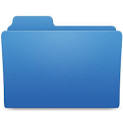
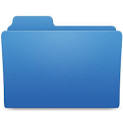
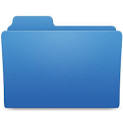
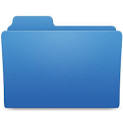
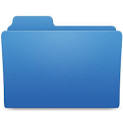
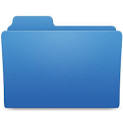
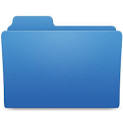
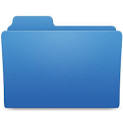
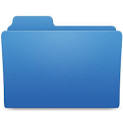
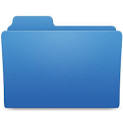
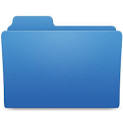
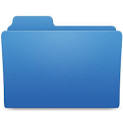
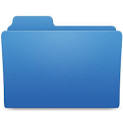

In [192]:
xls


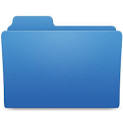
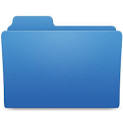

In [100]:
xls -l images/*

In [ ]:
ls -altr

In [6]:
find . | pydot_show_filetree

js" [label="xkcd.js"];
  "." -> ".___pycache__"VXf02" [label="TMP_TABLE.ZVXf02"];
  "._tmp_xls.tables" -> "._tmp_xls.tables_TMP_TABLE.ZVXf02.png";

  "._tmp_xls.tables_TMP_TABLE.ZVXf02.png" [label="TMP_TABLE.ZVXf02.png"];
  "._tmp_xls.tables" -> "._tmp_xls.tables_TMP_TABLE.zWR01I";

  "._tmp_xls.tables_TMP_TABLE.zWR01I" [label="TMP_TABLE.zWR01I"];
  "._tmp_xls.tables" -> "._tmp_xls.tables_TMP_TABLE.ZXfoFD";

  "._tmp_xls.tables_TMP_TABLE.ZXfoFD" [label="TMP_TABLE.ZXfoFD"];
  "._tmp_xls.tables" -> "._tmp_xls.tables_TMP_TABLE.ZxiTiB";

  "._tmp_xls.tables_TMP_TABLE.ZxiTiB" [label="TMP_TABLE.ZxiTiB"];
  "._tmp_xls.tables" -> "._tmp_xls.tables_TMP_TABLE.zxl3mk";

  "._tmp_xls.tables_TMP_TABLE.zxl3mk" [label="TMP_TABLE.zxl3mk"];
  "._tmp_xls.tables" -> "._tmp_xls.tables_TMP_TABLE.zxl3mk.jpg";

  "._tmp_xls.tables_TMP_TABLE.zxl3mk.jpg" [label="TMP_TABLE.zxl3mk.jpg"];
  "._tmp_xls.tables" -> "._tmp_xls.tables_TMP_TABLE.zXqvxl";

  "._tmp_xls.tables_TMP_TABLE.zXqvxl" [label="TMP_TABLE.zXqvxl"]

In [7]:
source ~/.metakernelrc

[Sun, Jul 17, 2016 8:31:03 AM] Sourcing <</home/mjbright/.metakernelrc>>

In [9]:
find  ./TESTS  | pydot_show_filetree  | pydot

In [21]:
function xfindtree {
    find "$@" | pydot_show_filetree  | pydot
}

In [22]:
xfindtree ./TESTS -iname '*.ipynb'

In [23]:
xfindtree ./TESTS \! -iname '*.ipynb'

In [27]:
xfindtree ./images

In [28]:
xfindtree ./images -iname '*.gif'

In [48]:
%%python

from ipywidgets import *
#from IPython.display import HTML
from metakernel.display import display
from metakernel.display import HTML

def myfn(freq, phase, color, rev):
    print("hw" + str(freq) + str(phase) + color + str(rev))

html=interact(myfn, freq=(0.0,5.0,0.1), phase=(-5.0,5.0,0.1), color=['red','blue','green'], rev=True);
display(html)

hw2.4000000000000004-0.09999999999999973redTrue


<function myfn at 0x000000001B890950>

In [50]:
ipython test.py

<IPython.core.display.HTML object>

In [53]:
PYTHON "
print('hello world');
print('hello world')"

hello world
hello world


In [ ]:
PYTHON "
display(HTML('<h1>A test</h1>'))
"

In [66]:
%%python

 

f = lambda x: 1/x

print(f(2))

0.5


In [73]:
PYTHON "
html=interact(lambda x: display(HTML('<b>' + str(x) + '</b>')), x=True)
"

In [61]:
PYTHON "
def myfn(msg):
    print(msg);
    print(msg);
    pass;


myfn('hello1')
"

In [54]:
PYTHON "
def myfn(freq, phase, color, rev):
    print("hw" + str(freq) + str(phase) + color + str(rev))
    
html=interact(myfn, freq=(0.0,5.0,0.1), phase=(-5.0,5.0,0.1), color=['red','blue','green'], rev=True);display(html)"

Traceback (most recent call last):
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magics\python_magic.py", line 19, in exec_code
    exec(code, env)
  File "<string>", line 1
    def myfn(freq, phase, color, rev): print(hw + str(freq) + str(phase) + color + str(rev)) html=interact(myfn, freq=(0.0,5.0,0.1), phase=(-5.0,5.0,0.1), color=['red','blue','green'], rev=True);display(html)
                                                                                                ^
SyntaxError: invalid syntax



In [40]:
function progress_bar {
    [ -z "$1" ] && {
        echo "<h2>Progress:</h2><div id=prog><table width=800><tr><td></td></table></div>" | html;
        return
    }
    
    echo "\$('#prog').html('<table width=700><tr><td width=${1}% style=\'background-color:red\';><b>${1}%</b></td><td></td></table>')" | js
}

In [97]:
function progress_bar {
    ID=$1; shift
    
    [ -z "$1" ] && {
        echo "<h2>Progress: $ID</h2><div id=progress_$ID><table width=800><tr><td></td></table></div>" | html;
        return
    }
    
    echo "\$('#progress_$ID').html('<table width=700><tr><td width=${1}% style=\'background-color:red\';><b>${1}%</b></td><td></td></table>')" | js
}

In [99]:
progress_bar TEST1

""


In [100]:
progress_bar TEST2

""


In [101]:
progress_bar TEST1 10; 

<IPython.core.display.Javascript object>

In [102]:
progress_bar TEST2 20

<IPython.core.display.Javascript object>

In [103]:
progress_bar TEST1 30

<IPython.core.display.Javascript object>

In [39]:
for i in 10 50  100; do progress $i; done

<IPython.core.display.Javascript object>

In [ ]:
progress 100

In [108]:
function df_bar {
    NAME=$1; shift
    ID=$(echo $NAME | sed 's/\//_/g')
    
    LOW=70
    HIGH=90
    [ -z "$1" ] && {
        echo "<h2>Disk usage: $NAME</h2><div id=disk_$ID><table width=800><tr><td></td></table></div>" | html;
        return
    }
    
    COLOR="yellow"
    [ $1 -ge $LOW ]  && COLOR="orange"
    [ $1 -ge $HIGH ] && COLOR="red"
    echo "\$('#disk_$ID').html('<table width=700><tr><td width=${1}% style=\'background-color:$COLOR\';><b>${1}%</b></td><td></td></table>')" | js
}

In [109]:
df_bar "wrco1_/"

""


In [110]:
df_bar "wrco1_/mnt/state"

""


In [111]:
df_bar "wrco1_/" 90

<IPython.core.display.Javascript object>

In [112]:
df_bar "wrco1_/mnt/state" 40

<IPython.core.display.Javascript object>

In [115]:
echo "<h2>Progress:</h2><div id=prog><table width=700><tr><td></td></table></div>" | html;

""


In [118]:
echo "\$('#prog').text('stdin')" | js

<IPython.core.display.Javascript object>

In [119]:
echo "\$('#prog').html('<h1>XXXX</h1>')" | js

<IPython.core.display.Javascript object>

In [120]:
echo "\$('#prog').html('<table width=700><tr><td width=90% style=\'background-color:red\';></td><td></td></table>')" | js

<IPython.core.display.Javascript object>

In [ ]:
#while true; do echo "hello"; sleep 1; done

In [3]:
#for i in $(seq 1 10); do echo "\$('#prog').html('<table width=700><tr><td width=${i}0% style=\'background-color:blue\';></td><td></td></table>')" | js; done

<IPython.core.display.Javascript object>

In [139]:
%%html

<h1> Testing HTML and JS interaction </h1>

<div id="test_div"><b> A test div </b></div>

In [140]:
%%javascript

$('#test_div').text('Replacement text sent by using the %%javascript cellmagic');

<IPython.core.display.Javascript object>

In [141]:
js "\$('#test_div').text('text passed by text() function as arguments to js() function')"

<IPython.core.display.Javascript object>

In [142]:
echo "\$('#test_div').text('<b>Sending text from stdin</b>')" | js

<IPython.core.display.Javascript object>

In [143]:
echo "\$('#test_div').html('<b>Sending html from stdin</b>')" | js

<IPython.core.display.Javascript object>

In [146]:
js "\$('#test_div').html('
<br/>
We can insert <b style=\"color:red;\">**any** reasonable HTML</b>

<table width=800>
<tr><th>Header1</th><th>Header2</th></tr>
<tr><td>r1c1</td><td>r1c2</td></tr>
<tr><td>r2c1</td><td>rcc2</td></tr>
</table>
')"

<IPython.core.display.Javascript object>

# base64 encoded images

In [153]:
%load OP
    